# Import Data

In [1]:
import pandas as pd

In [2]:
weather_df = pd.read_csv('data/weather_data_cleaned.csv')
crowd_df = pd.read_csv('data/sensor_data.csv')
crowd_df['timestamp'] = pd.to_datetime(crowd_df['timestamp'], utc=False)
weather_df['datetime'] = pd.to_datetime(weather_df['datetime'], utc=False)
weather_df = weather_df.rename(columns={'datetime': 'timestamp'})
weather_df['timestamp'] = weather_df['timestamp'].dt.tz_localize(None)
crowd_df['timestamp'] = crowd_df['timestamp'].dt.tz_localize(None)

# Inspect Data 

In [3]:
weather_df.head()

timestamp  temperature  dew_point  air_pressure  wind_speed  \
0 2025-08-20 00:00:00         16.8       12.5        1014.6         4.0   
1 2025-08-20 01:00:00         17.1       12.7        1014.5         3.0   
2 2025-08-20 02:00:00         17.3       12.9        1014.3         4.0   
3 2025-08-20 03:00:00         17.0       12.6        1014.2         4.0   
4 2025-08-20 04:00:00         16.8       11.3        1014.1         4.0   

   max_gust  rainfall  sunshine_duration  relative_humidity  
0       7.0       0.0                0.0                 75  
1       6.0       0.0                0.0                 75  
2       5.0       0.0                0.0                 75  
3       7.0       0.0                0.0                 74  
4       7.0       0.0                0.0                 70

In [4]:
crowd_df.head()

timestamp  CMSA-GAKH-01_0  CMSA-GAKH-01_180  CMSA-GAWW-11_120  \
0 2025-08-20 00:00:00              15                 4                29   
1 2025-08-20 00:03:00               1                 3                21   
2 2025-08-20 00:06:00               5                 4                35   
3 2025-08-20 00:09:00               4                 4                40   
4 2025-08-20 00:12:00               4                11                54   

   CMSA-GAWW-11_300  CMSA-GAWW-12_115  CMSA-GAWW-12_295  CMSA-GAWW-13_120  \
0                33                44                28                42   
1                29                34                39                 9   
2                22                29                34                33   
3                47                42                40                19   
4                59                58                33                17   

   CMSA-GAWW-13_300  CMSA-GAWW-14_40  ...  GVCV-13_10  GVCV-13_190  \
0                37               11  ...          41           40   
1                14                6  ...           0            0   
2                42               14  ...           0            0   
3                34               15  ...           0            0   
4                33               26  ...         127           57   

   GVCV-14_90  GVCV-14_270  hour  minute  day  month  weekday  is_weekend  
0           0            0     0       0   20      8        2           0  
1           0            0     0       3   20      8        2           0  
2           0            0     0       6   20      8        2           0  
3           0            0     0       9   20      8        2           0  
4           0            0     0      12   20      8        2           0  

[5 rows x 81 columns]

# Merge data based on timestamp

In [5]:
merged_df = pd.merge_asof(
    crowd_df,
    weather_df,
    on = 'timestamp',
    direction = 'nearest',
    tolerance = pd.Timedelta('60min')
)
merged_df.head(75)

timestamp  CMSA-GAKH-01_0  CMSA-GAKH-01_180  CMSA-GAWW-11_120  \
0  2025-08-20 00:00:00              15                 4                29   
1  2025-08-20 00:03:00               1                 3                21   
2  2025-08-20 00:06:00               5                 4                35   
3  2025-08-20 00:09:00               4                 4                40   
4  2025-08-20 00:12:00               4                11                54   
..                 ...             ...               ...               ...   
70 2025-08-20 03:30:00               1                 1                 3   
71 2025-08-20 03:33:00               1                 1                 1   
72 2025-08-20 03:36:00               0                 0                 3   
73 2025-08-20 03:39:00               0                 1                 2   
74 2025-08-20 03:42:00               0                 2                 6   

    CMSA-GAWW-11_300  CMSA-GAWW-12_115  CMSA-GAWW-12_295  CMSA-GAWW-13_120  \
0                 33                44                28                42   
1                 29                34                39                 9   
2                 22                29                34                33   
3                 47                42                40                19   
4                 59                58                33                17   
..               ...               ...               ...               ...   
70                 3                 5                 3                 2   
71                 2                 3                 9                 3   
72                 0                10                10                 2   
73                 3                 1                 6                 0   
74                 7                 7                 6                 0   

    CMSA-GAWW-13_300  CMSA-GAWW-14_40  ...  weekday  is_weekend  temperature  \
0                 37               11  ...        2           0         16.8   
1                 14                6  ...        2           0         16.8   
2                 42               14  ...        2           0         16.8   
3                 34               15  ...        2           0         16.8   
4                 33               26  ...        2           0         16.8   
..               ...              ...  ...      ...         ...          ...   
70                 3                1  ...        2           0         17.0   
71                 4                3  ...        2           0         16.8   
72                 1                3  ...        2           0         16.8   
73                 0                0  ...        2           0         16.8   
74                 0                1  ...        2           0         16.8   

    dew_point  air_pressure  wind_speed  max_gust  rainfall  \
0        12.5        1014.6         4.0       7.0       0.0   
1        12.5        1014.6         4.0       7.0       0.0   
2        12.5        1014.6         4.0       7.0       0.0   
3        12.5        1014.6         4.0       7.0       0.0   
4        12.5        1014.6         4.0       7.0       0.0   
..        ...           ...         ...       ...       ...   
70       12.6        1014.2         4.0       7.0       0.0   
71       11.3        1014.1         4.0       7.0       0.0   
72       11.3        1014.1         4.0       7.0       0.0   
73       11.3        1014.1         4.0       7.0       0.0   
74       11.3        1014.1         4.0       7.0       0.0   

    sunshine_duration  relative_humidity  
0                 0.0                 75  
1                 0.0                 75  
2                 0.0                 75  
3                 0.0                 75  
4                 0.0                 75  
..                ...                ...  
70                0.0                 74  
71                0.0                 70  
72                0.0             

In [6]:
merged_df.tail(10)

timestamp  CMSA-GAKH-01_0  CMSA-GAKH-01_180  CMSA-GAWW-11_120  \
2390 2025-08-24 23:30:00              12                17                43   
2391 2025-08-24 23:33:00               5                14                26   
2392 2025-08-24 23:36:00               0                 4                30   
2393 2025-08-24 23:39:00              10                 8                45   
2394 2025-08-24 23:42:00               5                 8                59   
2395 2025-08-24 23:45:00              11                 9                38   
2396 2025-08-24 23:48:00               2                 1                46   
2397 2025-08-24 23:51:00              10                 2                51   
2398 2025-08-24 23:54:00               3                 1                24   
2399 2025-08-24 23:57:00               6                 1                38   

      CMSA-GAWW-11_300  CMSA-GAWW-12_115  CMSA-GAWW-12_295  CMSA-GAWW-13_120  \
2390                36                68               101                17   
2391                46                89                63                46   
2392                43                72                81                25   
2393                57                52                69                38   
2394                54                82                84                24   
2395                44                51                51                 6   
2396                42                30                45                34   
2397                26                42                59                21   
2398                36                42                32                12   
2399                65                56                41                21   

      CMSA-GAWW-13_300  CMSA-GAWW-14_40  ...  weekday  is_weekend  \
2390                32               31  ...        6           1   
2391                44               26  ...        6           1   
2392                46               36  ...        6           1   
2393                20               10  ...        6           1   
2394                29               24  ...        6           1   
2395                19               18  ...        6           1   
2396                33                8  ...        6           1   
2397                30               22  ...        6           1   
2398                55                9  ...        6           1   
2399                45               10  ...        6           1   

      temperature  dew_point  air_pressure  wind_speed  max_gust  rainfall  \
2390         12.5       11.2        1020.8         2.0       2.0       0.0   
2391         12.5       11.2        1020.8         2.0       2.0       0.0   
2392         12.5       11.2        1020.8         2.0       2.0       0.0   
2393         12.5       11.2        1020.8         2.0       2.0       0.0   
2394         12.5       11.2        1020.8         2.0       2.0       0.0   
2395         12.5       11.2        1020.8         2.0       2.0       0.0   
2396         12.5       11.2        1020.8         2.0       2.0       0.0   
2397         12.5       11.2        1020.8         2.0       2.0       0.0   
2398         12.5       11.2        1020.8         2.0       2.0       0.0   
2399         12.5       11.2        1020.8         2.0       2.0       0.0   

      sunshine_duration  relative_humidity  
2390                0.0                 91  
2391                0.0                 91  
2392                0.0                 91  
2393                0.0                 91  
2394                0.0                 91  
2395                0.0                 91  
2396                0.0                 91  
2397                0.0                 91  
2398                0.0                 91  
2399                0.0                 91  

[10 rows x 89 columns]

# Define sensor columns and feature columns for further exploration

In [7]:
sensor_cols = merged_df.columns[1:-14]
sensor_cols

Index(['CMSA-GAKH-01_0', 'CMSA-GAKH-01_180', 'CMSA-GAWW-11_120',
       'CMSA-GAWW-11_300', 'CMSA-GAWW-12_115', 'CMSA-GAWW-12_295',
       'CMSA-GAWW-13_120', 'CMSA-GAWW-13_300', 'CMSA-GAWW-14_40',
       'CMSA-GAWW-14_220', 'CMSA-GAWW-15_30', 'CMSA-GAWW-15_210',
       'CMSA-GAWW-16_30', 'CMSA-GAWW-16_210', 'CMSA-GAWW-17_40',
       'CMSA-GAWW-17_220', 'CMSA-GAWW-19_115', 'CMSA-GAWW-19_295',
       'CMSA-GAWW-20_120', 'CMSA-GAWW-20_300', 'CMSA-GAWW-21_120',
       'CMSA-GAWW-21_300', 'CMSA-GAWW-23_109', 'CMSA-GAWW-23_289',
       'GACM-04_50', 'GACM-04_230', 'GASA-01-A1_135', 'GASA-01-A1_315',
       'GASA-01-A2_135', 'GASA-01-A2_315', 'GASA-01-B_135', 'GASA-01-B_315',
       'GASA-01-C_135', 'GASA-01-C_315', 'GASA-02-01_135', 'GASA-02-01_315',
       'GASA-02-02_135', 'GASA-02-02_315', 'GASA-03_105', 'GASA-03_285',
       'GASA-04_135', 'GASA-04_315', 'GASA-05-O_135', 'GASA-05-O_315',
       'GASA-05-W_135', 'GASA-05-W_315', 'GASA-06_95', 'GASA-06_275',
       'GASA-06-B_95', 'GASA-0

In [8]:
feature_cols = merged_df.columns[-14:]
feature_cols

Index(['hour', 'minute', 'day', 'month', 'weekday', 'is_weekend',
       'temperature', 'dew_point', 'air_pressure', 'wind_speed', 'max_gust',
       'rainfall', 'sunshine_duration', 'relative_humidity'],
      dtype='object')

# Set Timestamp as index 

In [9]:
merged_df.set_index('timestamp')

CMSA-GAKH-01_0  CMSA-GAKH-01_180  CMSA-GAWW-11_120  \
timestamp                                                                 
2025-08-20 00:00:00              15                 4                29   
2025-08-20 00:03:00               1                 3                21   
2025-08-20 00:06:00               5                 4                35   
2025-08-20 00:09:00               4                 4                40   
2025-08-20 00:12:00               4                11                54   
...                             ...               ...               ...   
2025-08-24 23:45:00              11                 9                38   
2025-08-24 23:48:00               2                 1                46   
2025-08-24 23:51:00              10                 2                51   
2025-08-24 23:54:00               3                 1                24   
2025-08-24 23:57:00               6                 1                38   

                     CMSA-GAWW-11_300  CMSA-GAWW-12_115  CMSA-GAWW-12_295  \
timestamp                                                                   
2025-08-20 00:00:00                33                44                28   
2025-08-20 00:03:00                29                34                39   
2025-08-20 00:06:00                22                29                34   
2025-08-20 00:09:00                47                42                40   
2025-08-20 00:12:00                59                58                33   
...                               ...               ...               ...   
2025-08-24 23:45:00                44                51                51   
2025-08-24 23:48:00                42                30                45   
2025-08-24 23:51:00                26                42                59   
2025-08-24 23:54:00                36                42                32   
2025-08-24 23:57:00                65                56                41   

                     CMSA-GAWW-13_120  CMSA-GAWW-13_300  CMSA-GAWW-14_40  \
timestamp                                                                  
2025-08-20 00:00:00                42                37               11   
2025-08-20 00:03:00                 9                14                6   
2025-08-20 00:06:00                33                42               14   
2025-08-20 00:09:00                19                34               15   
2025-08-20 00:12:00                17                33               26   
...                               ...               ...              ...   
2025-08-24 23:45:00                 6                19               18   
2025-08-24 23:48:00                34                33                8   
2025-08-24 23:51:00                21                30               22   
2025-08-24 23:54:00                12                55                9   
2025-08-24 23:57:00                21                45               10   

                     CMSA-GAWW-14_220  ...  weekday  is_weekend  temperature  \
timestamp                              ...                                     
2025-08-20 00:00:00                 3  ...        2           0         16.8   
2025-08-20 00:03:00                 6  ...        2           0         16.8   
2025-08-20 00:06:00                 3  ...        2           0         16.8   
2025-08-20 00:09:00                 2  ...        2           0         16.8   
2025-08-20 00:12:00                 9  ...        2           0         16.8   
...                               ...  ...      ...         ...          ...   
2025-08-24 23:45:00                18  ...        6           1         12.5   
2025-08-24 23:48:00                 1  ...        6           1         12.5   
2025-08-24 23:51:00                 9  ...        6           1         12.5   
2025-08-24 23:54:00                 8  ...        6           1         12.5   
2025-08-24 23:57:00                 3  ...        6           1         12.5   

             

In [10]:
merged_df.head()

timestamp  CMSA-GAKH-01_0  CMSA-GAKH-01_180  CMSA-GAWW-11_120  \
0 2025-08-20 00:00:00              15                 4                29   
1 2025-08-20 00:03:00               1                 3                21   
2 2025-08-20 00:06:00               5                 4                35   
3 2025-08-20 00:09:00               4                 4                40   
4 2025-08-20 00:12:00               4                11                54   

   CMSA-GAWW-11_300  CMSA-GAWW-12_115  CMSA-GAWW-12_295  CMSA-GAWW-13_120  \
0                33                44                28                42   
1                29                34                39                 9   
2                22                29                34                33   
3                47                42                40                19   
4                59                58                33                17   

   CMSA-GAWW-13_300  CMSA-GAWW-14_40  ...  weekday  is_weekend  temperature  \
0                37               11  ...        2           0         16.8   
1                14                6  ...        2           0         16.8   
2                42               14  ...        2           0         16.8   
3                34               15  ...        2           0         16.8   
4                33               26  ...        2           0         16.8   

   dew_point  air_pressure  wind_speed  max_gust  rainfall  sunshine_duration  \
0       12.5        1014.6         4.0       7.0       0.0                0.0   
1       12.5        1014.6         4.0       7.0       0.0                0.0   
2       12.5        1014.6         4.0       7.0       0.0                0.0   
3       12.5        1014.6         4.0       7.0       0.0                0.0   
4       12.5        1014.6         4.0       7.0       0.0                0.0   

   relative_humidity  
0                 75  
1                 75  
2                 75  
3                 75  
4                 75  

[5 rows x 89 columns]

# Visualise crowd data from all sensors 
Look out for inconsistencies, outliers and trends.

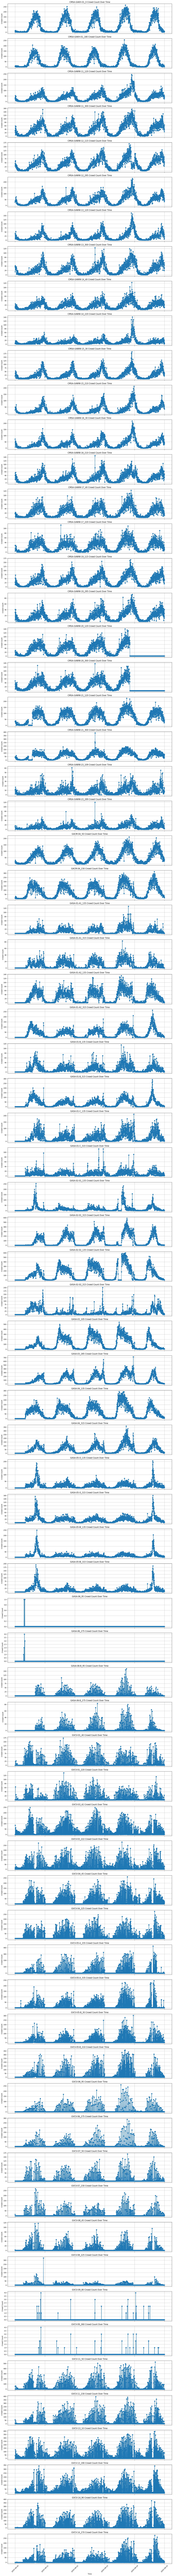

In [11]:
import matplotlib.pyplot as plt

num_sensors = len(sensor_cols)
fig, axes = plt.subplots(num_sensors, 1, figsize=(15, 3*num_sensors), sharex=True)

for i, sensor in enumerate(sensor_cols):
    axes[i].plot(merged_df['timestamp'], merged_df[sensor], marker='o')
    axes[i].set_title(f'{sensor} Crowd Count Over Time')
    axes[i].set_ylabel('Crowd Count')
    axes[i].grid(True)

axes[-1].set_xlabel('Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Explore relationship between sensors

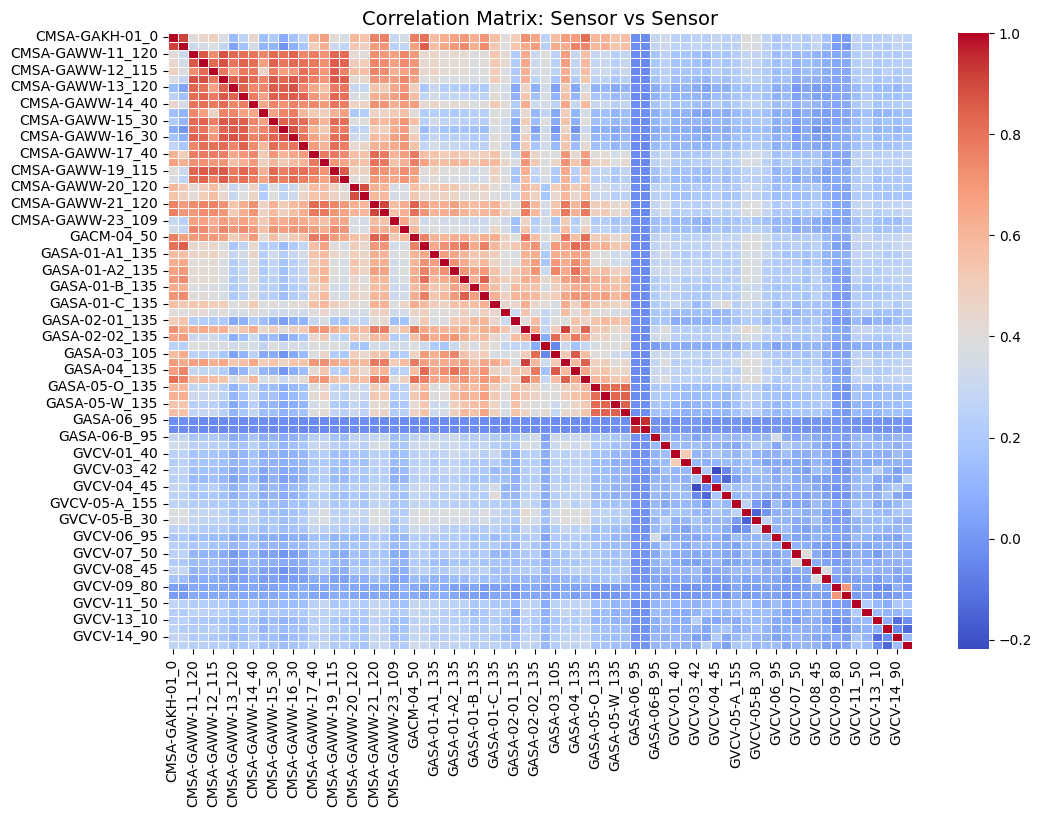

In [12]:
import seaborn as sns
plt.figure(figsize=(12,8))
corr_df = merged_df[sensor_cols]
corr_matrix = corr_df.corr()
sns.heatmap(corr_matrix, annot = False, fmt = ".2f", cmap = "coolwarm", cbar = True, linewidths = 0.5)
plt.title("Correlation Matrix: Sensor vs Sensor", fontsize = 14)
plt.show()

# Explore relationship between crowd count and weather features 

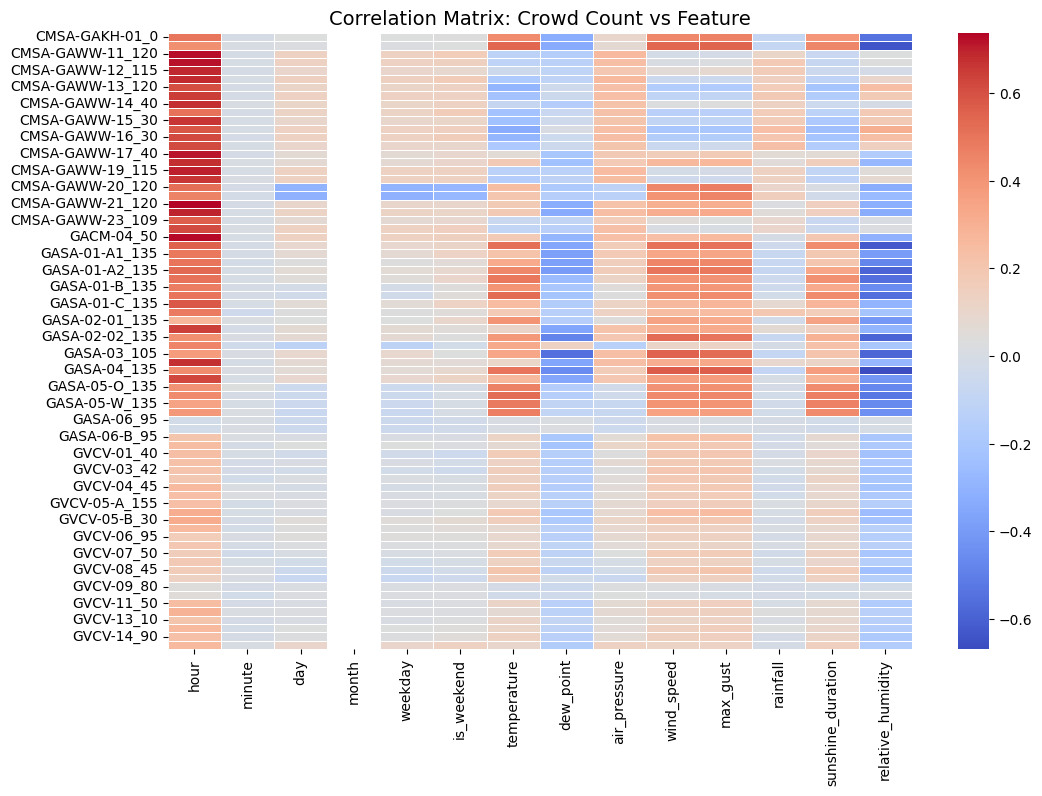

In [ ]:
# Heatmap to show correlation between features (weather,weekend, etc) and target (crowd count)
import seaborn as sns
plt.figure(figsize=(12,8))
sensor_cols_listß = list(sensor_cols)
feature_cols_list = list(feature_cols)
corr_df = merged_df[sensor_cols_list + feature_cols_list]
corr_matrix = corr_df.corr()
sensor_feature_corr = corr_matrix.loc[sensor_cols, feature_cols]
sns.heatmap(sensor_feature_corr, annot = False, fmt = ".2f", cmap = "coolwarm", cbar = True, linewidths = 0.5)
plt.title("Correlation Matrix: Crowd Count vs Feature", fontsize = 14)
plt.show()

# Explore relationship between current and historical data

The x-axis of the ACF indicates the time interval between the current observation and past ones, also know as the 'lag', while the y-axis represents the correlation values between current observation and observation at a particular lag. The blue shaded area represents the 95% confidence interval. Any bars that extend beyond (above/below) the blue area is statistically significant. 

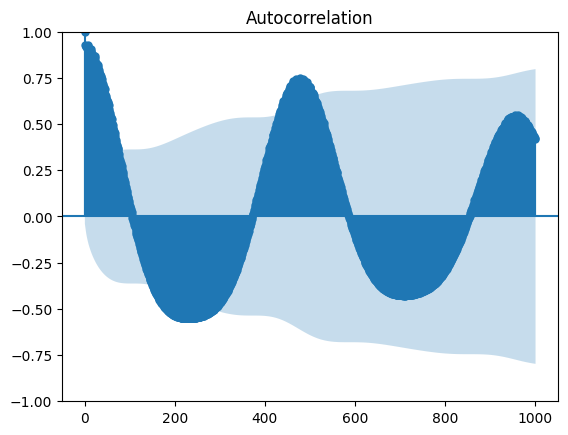

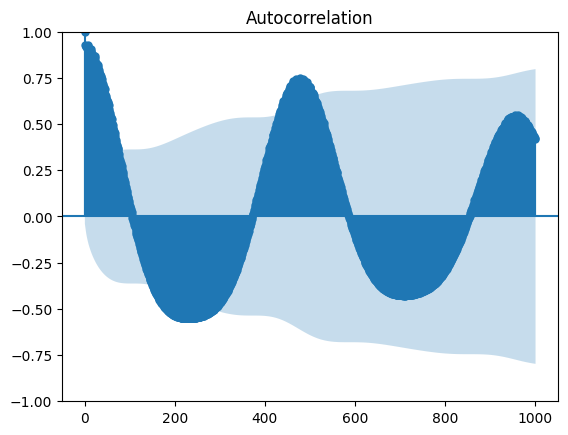

In [14]:
# Autocorrelation plot to show significance of historic data on present data

from statsmodels.graphics.tsaplots import plot_acf

plot_acf(merged_df['CMSA-GAKH-01_0'], lags=1000)


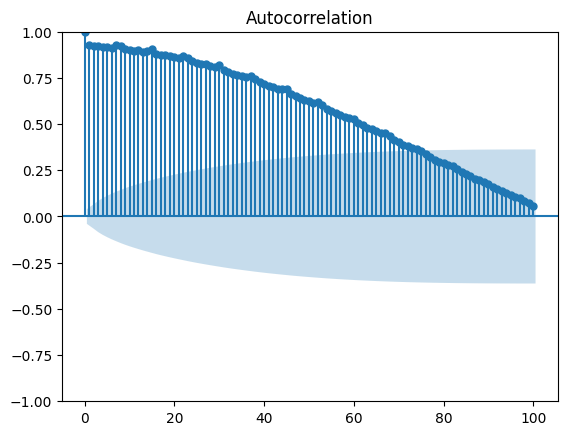

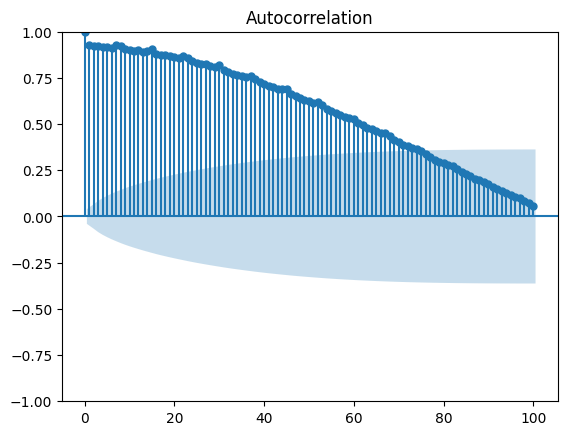

In [15]:
plot_acf(merged_df['CMSA-GAKH-01_0'], lags=100)